## Author : Devansh Mathur

### Task 2 : Sales Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Advertising.csv")


In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Checking the relation between variables and sales

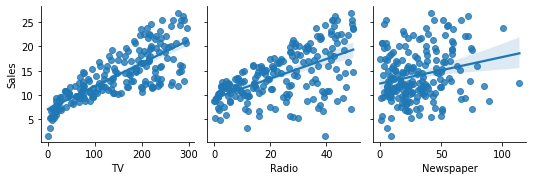

In [8]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

In [9]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


Scaling the values between 0 and 1

In [11]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)
x_test_scaled

array([[ 0.31169191,  0.45489058,  0.74818001],
       [ 0.66693106,  1.5346898 ,  0.74818001],
       [ 1.74592846,  0.23356527,  0.38371819],
       [-1.36601071,  0.81035243,  0.45886496],
       [ 0.94249039,  1.62187856, -1.11921718],
       [-0.66438573,  0.68292271,  0.74066534],
       [ 0.90375715,  1.27983036, -0.21745596],
       [-0.94215839, -0.88647493, -0.54810174],
       [ 0.96573034, -1.43643478, -0.74724068],
       [ 0.44227827, -0.15543073, -0.05589041],
       [-1.14689123, -0.01458735, -1.15679057],
       [-0.87354523, -1.28217775, -0.1235225 ],
       [ 1.09963668, -1.43643478,  1.94677097],
       [-1.43573054,  0.34087451, -0.8862622 ],
       [ 0.04830588, -1.52362354, -0.23999999],
       [ 0.38805173, -1.14133437,  0.08313111],
       [-1.41470392,  0.22015161,  0.3160861 ],
       [ 0.69127767, -0.10177611, -0.70590996],
       [-0.6621724 , -0.30298093, -0.01831702],
       [ 1.13172994,  0.17991065, -0.82614479],
       [ 1.04430348,  0.50183837,  1.548

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [13]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [14]:
y_pred=lr.predict(x_test_scaled)
y_pred

array([16.58534325, 20.93766365, 21.34568189, 11.24650542, 22.11385227,
       13.54751052, 21.06342583,  8.04754087, 13.68240487, 15.32768341,
        9.6773921 ,  7.22465671, 14.3372533 ,  9.59784578, 10.01397456,
       12.37840059,  9.40720081, 16.37840097, 10.7604122 , 18.81617532,
       19.51892748, 13.67198022, 12.90878406, 21.1929471 ,  8.37148519,
        6.40180812, 20.7712911 , 12.29336321,  9.65041037,  9.20182049,
       12.60817226, 10.51389422, 21.41676363, 12.82955411, 18.12766392,
       20.11098404, 14.58544413, 20.69293515, 11.40010316,  5.24234371])

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8863195562008254

WE GET AN ACCURACY OF 88.63 % WHICH PREDICTING SALES.

In [22]:
#We can also check sale value for input values:
tv=float(input("Enter value for time spent to advertise TV's : "))
radio=float(input("Enter value for time spent to advertise TV's : "))
npaper=float(input("Enter value for time spent to advertise TV's : "))

inp=np.array([[tv,radio,npaper]])
inp

array([[169.,  50.,  34.]])

In [25]:
inp_sc=Sc.transform(inp)
print(inp_sc)
y_pred_inp=lr.predict(inp_sc)

print(f"The sales for entered advertisment time is : ₹{y_pred_inp[0]:.2f}")

[[0.37477176 1.68894684 0.03804305]]
The sales for entered advertisment time is : ₹20.23


Thank You!